In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(1950,2050)]
i =0
result = np.zeros((100,700))

In [3]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ice1950-2050/B.E.13.B1950TRC5.ne120_t12.cesm-ihesp-1950-2050.013.cice.h.'+yy+'-'+mm +'.cice.nc')
        plotvar = data.variables['aice'][0,:,:]
        #plotvar = data.variables['HMXL'][0,:,:]
        lont = data.variables['lont_bounds'][:,:,0]
        latt = data.variables['latt_bounds'][:,:,0]
        lont = lont[220:324,700:1400]
        latt = latt[220:324,700:1400]
        #plotvar = plotvar[248:344,700:1400]
        plotvar = plotvar[220:324,700:1400]
#       lont = lont[180:320,500:1200]
#        latt = latt[180:320,500:1200]
#        plotvar = plotvar[180:320,500:1200]
        aveplot = plotvar.mean(axis=0)
        
        result[i] = aveplot
        
        i = i + 1
#********************************************************************


In [4]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: B.E.13.B1950TRC5.ne120_t12.cesm-ihesp-1950-2050.013
    contents: Diagnostic and Prognostic Variables
    source: sea ice model: Community Ice Code (CICE)
    comment: All years have exactly 365 days
    comment2: File written on model date 20491001
    comment3: seconds elapsed into model date:      0
    conventions: CF-1.0
    history: Thu Jul  9 13:15:04 2020: ncks -v aice -d nj,0,600 -d ni,0,3599 B.E.13.B1950TRC5.ne120_t12.cesm-ihesp-1950-2050.013.cice.h.2049-09.nc B.E.13.B1950TRC5.ne120_t12.cesm-ihesp-1950-2050.013.cice.h.2049-09.cice.nc
This dataset was created on 2019-12-19 at 20:25
    NCO: netCDF Operators version 4.8.1 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)
    dimensions(sizes): nj(601), ni(3600), time(1), nvertices(4), d2(2)
    variables(dimensions): float32 TLAT(nj,ni), float32 TLON(nj,ni), float32 aice(time,nj,ni), float32 latt_bounds(nj,ni,nvertice

In [5]:
A = np.arange(100)
B = np.arange(700)
xx, yy = np.meshgrid(B, A)

In [6]:
# nice_cmap 控制色段 （130 白色）；nice_levels 控制color bar 标号
#################################################################
nice_cmap=sns.diverging_palette(245, 10, n=12,as_cmap=True)
lev_cmap = nice_cmap([0,10,30,40,50,60,80,90,105,115,125,130]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [15,20,30,40,50,60,70,80,95]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'spacing'
  import sys
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


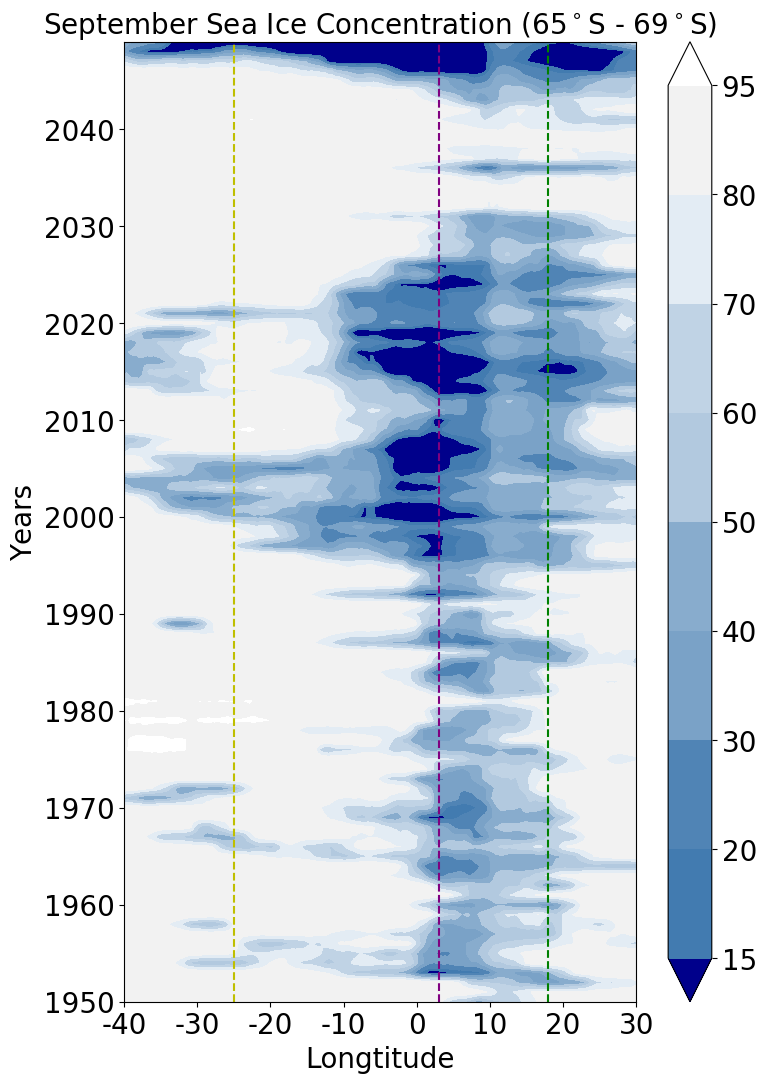

In [7]:
# plot the result
fig = plt.figure(figsize=(8, 12),dpi=100)
ax0 = fig.add_axes([0.15, 0.1, 0.8, 0.8])
#ax0 = fig.add_axes()
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.contourf(xx, yy, result,cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels,extend='both')

im.cmap.set_over('white')
im.cmap.set_under('darkblue')
#CS = ax0.contour(xx[:,430],yy[:,430],colors = 'r')
cbar = fig.colorbar(im, ax=ax0,ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)
#plt.hlines((27-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((39-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((56-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((69-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((94-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((106-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((120-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((138-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((168-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((203-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((252-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((261-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((300-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((326-20)*4, 0, 699, colors = "y",linestyles = "dashed")


plt.vlines(430, 0, 99, colors = "purple",linestyles = "dashed")
plt.vlines(580, 0, 99, colors = "g",linestyles = "dashed")
plt.vlines(150, 0, 99, colors = "y",linestyles = "dashed")
#plt.vlines(130, 0, 309, colors = "k",linestyles = "dashed")
#############################################################################
##设定X坐标值
#plt.xticks(range(0,701,100), ['-40', '-30', '-20', '-10', '0','10','20','30'],**my_font)

plt.xticks(range(0,701,100), ['-40','-30','-20','-10', '0', '10', '20','30'],**my_font)
plt.yticks(range(0,99,10), ['1950', '1960','1970', '1980','1990','2000', '2010','2020', '2030','2040','2050'],**my_font)
#plt.yticks(range(0,1241,40), ['20', '30','40', '50','60','70', '80','90', '100','110','120','130','140','150','160','170',\
#                             '180','190','200', '210','220','230', '240','250', '260','270','280','290','300','310','320','330'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.ylabel('Years',**my_font)
ax0.set_title('September Sea Ice Concentration (65$^\circ$S - 69$^\circ$S)',**my_font)
plt.savefig("H.png",bbox_inches='tight',dpi=fig.dpi)

In [8]:
latt[:,0]

masked_array(data=[-69.19639 , -69.15412 , -69.11186 , -69.0696  ,
                   -69.027336, -68.98508 , -68.94282 , -68.90055 ,
                   -68.85829 , -68.81603 , -68.773766, -68.73151 ,
                   -68.68925 , -68.64698 , -68.60472 , -68.56246 ,
                   -68.520195, -68.477936, -68.43568 , -68.39341 ,
                   -68.35115 , -68.30889 , -68.266624, -68.224365,
                   -68.1821  , -68.13984 , -68.09758 , -68.05531 ,
                   -68.013054, -67.970795, -67.92853 , -67.88627 ,
                   -67.84401 , -67.80174 , -67.75948 , -67.717224,
                   -67.67496 , -67.6327  , -67.59044 , -67.54817 ,
                   -67.50591 , -67.46365 , -67.42139 , -67.37913 ,
                   -67.33687 , -67.2946  , -67.25234 , -67.21008 ,
                   -67.167816, -67.12556 , -67.0833  , -67.04103 ,
                   -66.99877 , -66.95651 , -66.914246, -66.87199 ,
                   -66.82973 , -66.78746 , -66.7452  , -66.702

In [9]:
weddle = result[:,150]
maud = result[:,430]

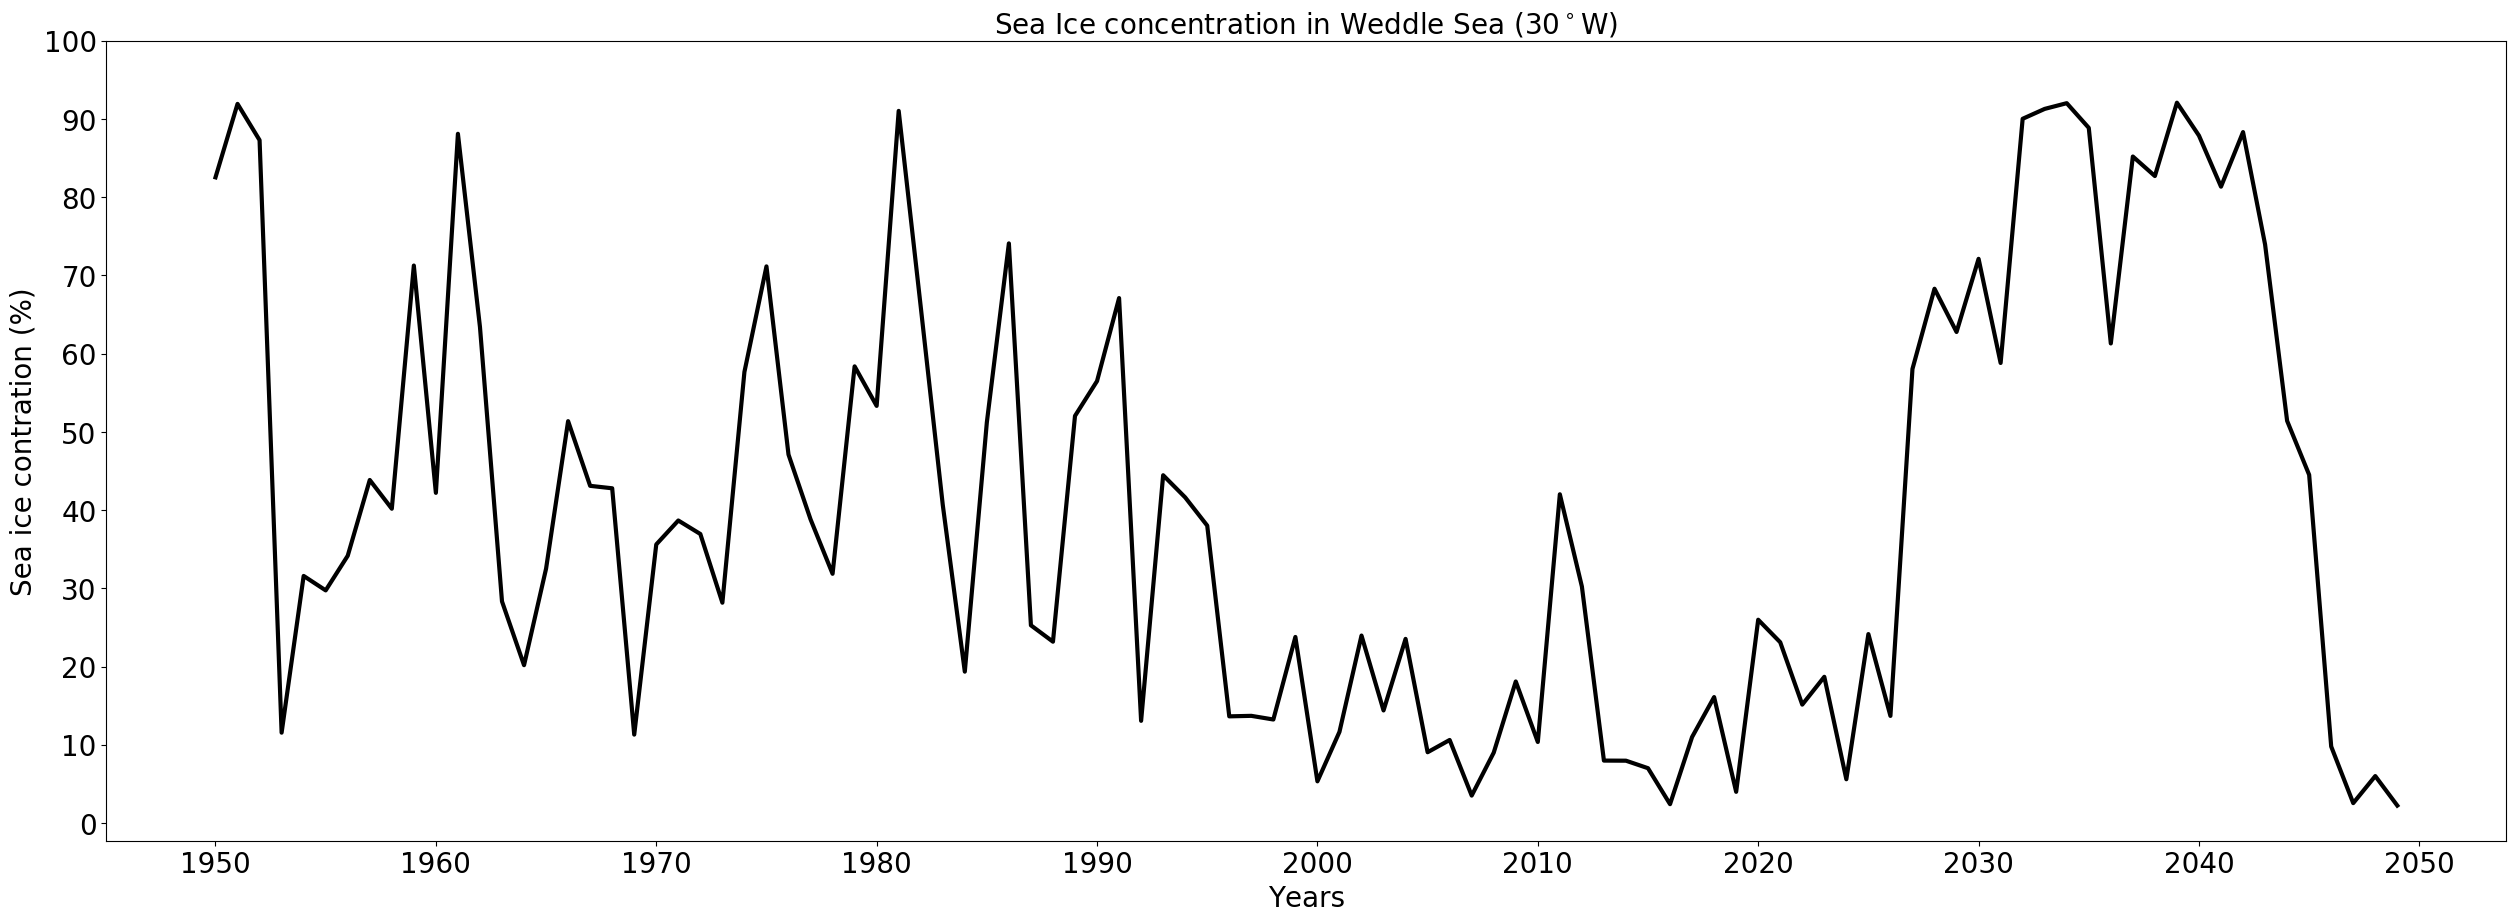

In [10]:
fig = plt.figure(figsize=(30, 10), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.plot(maud,'k',linewidth=3)
#im = ax0.plot(weddle,'r*')
#plt.xticks(range(0,310,10), ['20','70','120', '170', '220', '270','320'],**my_font)
plt.xticks(range(0,101,10), ['1950', '1960', '1970', '1980','1990','2000','2010','2020','2030','2040','2050'],**my_font)

plt.yticks(range(0,101,10), ['0', '10','20','30', '40', '50','60','70', '80','90','100'],**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Sea ice contration (%)',**my_font)
ax0.set_title('Sea Ice concentration in Weddle Sea (30$^\circ$W)',**my_font)
plt.savefig("weddle.png")


In [11]:
np.savetxt('weddle.out', weddle)